In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot, cm

from scipy import signal

# hexagonal lattice information

Given a lattice constant, \(a\), the two-body unit cell is \( \vec{r} = \left[ \left( 0, 0 \right), \left( \frac{a}{2}, \sqrt{3}\frac{a}{2} \right] \) with a box size of \( \left(a, \sqrt(3) a \right) \)

This is where sampling would potentially be worth it...instead, let's work with a centered square (rhombic??) lattice:

- \( \vec{r} = \left[ \left( 0, 0 \right), \left( \frac{a}{2}, \frac{a}{2} \right] \)
- \( \left( a, a \right) \)

We will accomplish this by adding dirac combs together

<IPython.core.display.Javascript object>


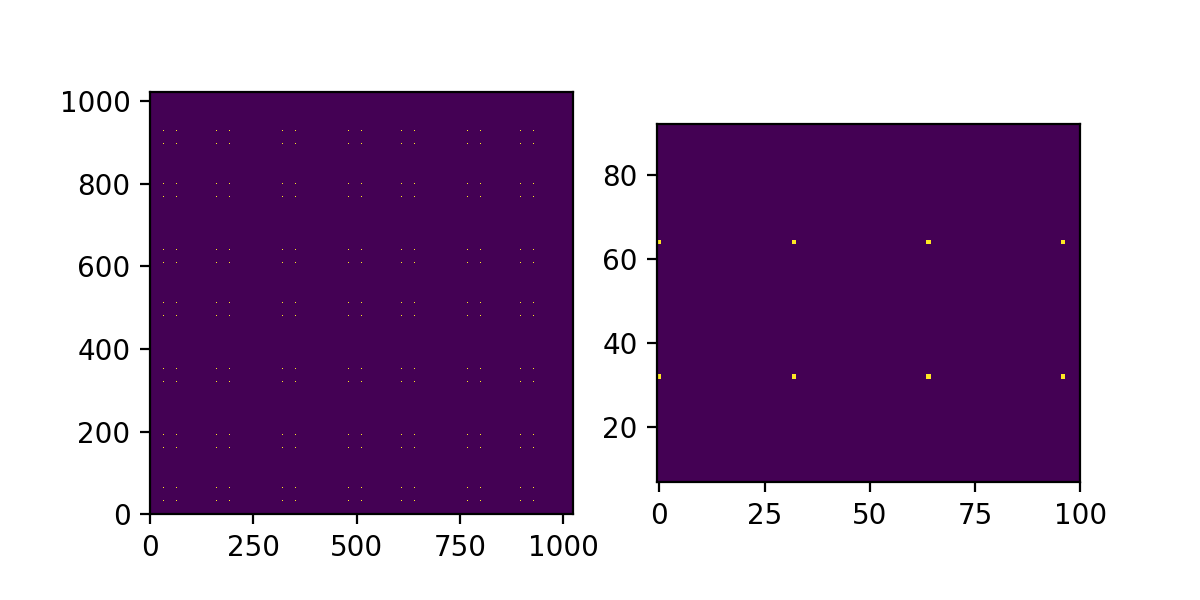

In [14]:
imPow = 10
imSize = np.power(2, imPow)
sPow = 5
spacing = np.power(2, sPow)
# let's see if I can play a trick to get this more quickly
# now do with the dirac function
dImage0 = signal.unit_impulse((spacing, spacing))
dImage1 = signal.unit_impulse((spacing, spacing))
# dImage1 = np.roll(np.roll(dImage1, 8, axis=0), 8, axis=1)
dImage = dImage0
# dImage = dImage0 + dImage1
dImage = np.tile(dImage, (np.power(2,imPow-sPow), np.power(2,imPow-sPow)))
# fourier transform the image
imNorm = imSize * imSize
latticeFFT = np.fft.fftshift(np.fft.fft2(dImage)/imNorm)
conjFFT = np.conjugate(latticeFFT)
realLatticeFFT = np.sqrt(np.real(np.multiply(latticeFFT, conjFFT)))
# display the image
fig = pyplot.figure(figsize=(6,3))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.imshow(dImage, origin="lower")
ax1.imshow(realLatticeFFT, origin="lower")

<IPython.core.display.Javascript object>


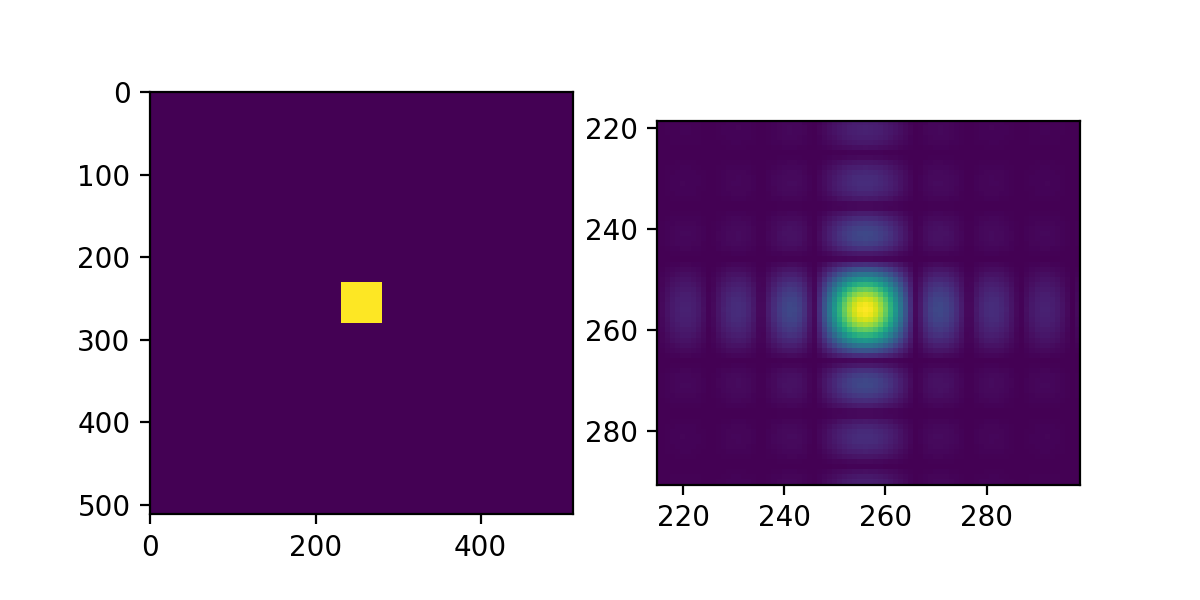

In [16]:
# now for the shape convolution
# define the image resolution
shapePow = 9
shapeSize = np.power(2, shapePow)
shapeNorm = shapeSize * shapeSize
shapeImage = np.zeros(shape=(shapeSize,shapeSize), dtype=np.float64)
# create a meshgrid
x = np.linspace(-1, 1, int(shapeSize))
y = np.linspace(-1, 1, int(shapeSize))
X, Y = np.meshgrid(x, y)

# set the center point as value 1
# latticeImage[N//2, N//2] = 1.0
shapeImage[shapeSize//2-shapeSize//20:shapeSize//2+shapeSize//20,
    shapeSize//2-shapeSize//20:shapeSize//2+shapeSize//20] = 1.0
# r = 0.15**2
# R = np.power(X, 2) + np.power(Y, 2)
# shapeImage[R < r] = 1.0
# take the FFT
shapeFFT = np.fft.fftshift(np.fft.fft2(shapeImage)/shapeNorm)
conjFFT = np.conjugate(shapeFFT)
realShapeFFT = np.sqrt(np.real(np.multiply(shapeFFT, conjFFT)))

fig = pyplot.figure(figsize=(6,3))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.imshow(shapeImage)
ax1.imshow(realShapeFFT)

<IPython.core.display.Javascript object>


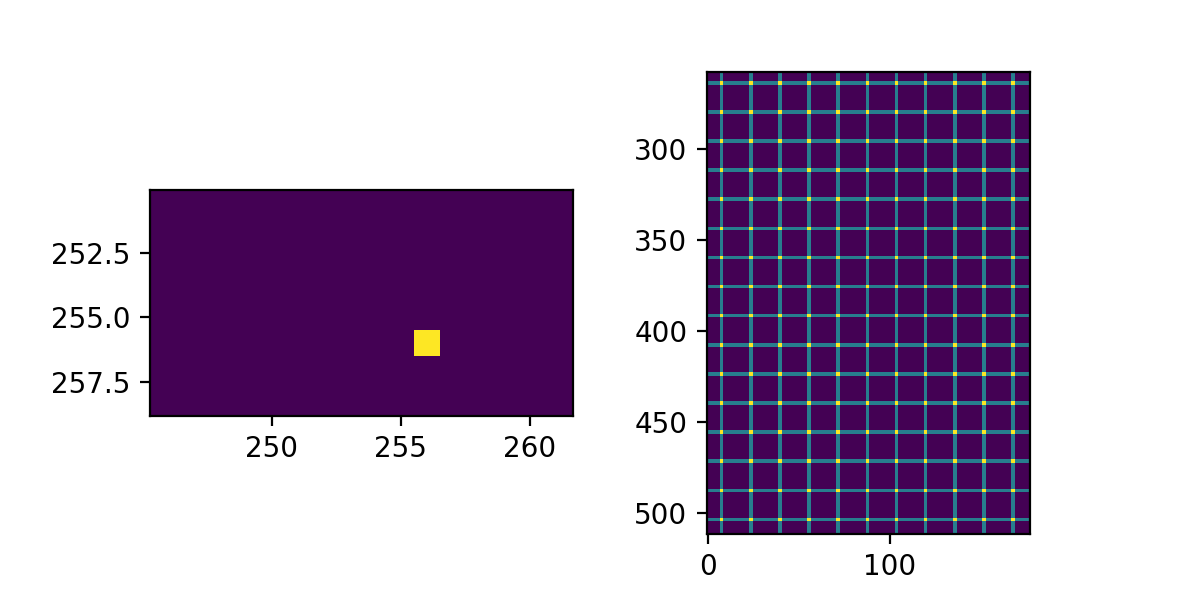

In [17]:
# now convolve
# convFFT = signal.convolve2d(latticeFFT, shapeFFT, mode='same', boundary='wrap')
# convFFT = np.multiply(latticeFFT[0:shapeSize,0:shapeSize], shapeFFT)
convFFT = np.multiply(latticeFFT[256:768, 256:768], shapeFFT)
conjFFT = np.conjugate(convFFT)
realConvFFT = np.sqrt(np.real(np.multiply(convFFT, conjFFT)))
# invert
invFFT = np.fft.ifft2(convFFT) * imNorm
conjInv = np.conjugate(invFFT)
realInv = np.sqrt(np.real(np.multiply(invFFT, conjInv)))

fig = pyplot.figure(figsize=(6,3))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.imshow(realConvFFT)
ax1.imshow(realInv)